In [204]:
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
df = pd.read_csv('Data scientist.csv')

In [130]:
df.head()

,Unnamed: 0,Title,Company,Rating,Location,Salary,Post_date,Extract_date,Job_url,Salary.1,Job Type,Number of hires for this role,Qualifications,Description
0,0,Data Scientist,"5G, LLC",NaN,"['Rockwall, TX 75032']","$80,000 - $100,000 a year",2 days ago,2021-09-06,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"['$80,000 - $100,000 a year']",['Full-time'],['1'],"[""Bachelor's (Preferred)""]",<bound method PageElement.format_string of <di...
1,1,Data Scientist,Intello Group,NaN,['Remote'],$55 - $65 an hour,Active 3 days ago,2021-09-06,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,['$55 - $65 an hour'],['Full-time'],['1'],"['US work authorization (Required)', ""Bachelor...",<bound method PageElement.format_string of <di...
2,2,Data Scientist (Time Series Forecasting),VI Solutions,NaN,['Remote'],"$100,000 - $110,000 a year",Active 4 days ago,2021-09-06,https://www.indeed.com/company/VI-Solutions/jo...,"['$100,000 - $110,000 a year']","['Full-time', 'Contract']",['On-going need to fill this role'],NaN,<bound method PageElement.format_string of <di...
3,3,Data Scientist,INTOLON,NaN,['Remote'],"$85,000 - $120,000 a year",Active 3 days ago,2021-09-06,https://www.indeed.com/company/INTOLON/jobs/Da...,"['$85,000 - $120,000 a year']",['Full-time'],['1'],"[""Master's (Preferred)"", 'Python: 1 year (Pref...",<bound method PageElement.format_string of <di...
4,4,Junior Data Scientist,SiteZeus,5.0,['Remote'],"$50,000 - $85,000 a year",4 days ago,2021-09-06,https://www.indeed.com/rc/clk?jk=69618d3f41471...,"['$50,000 - $85,000 a year']",['Full-time'],NaN,NaN,<bound method PageElement.format_string of <di...


In [3]:
TTQ = df[['Title', 'Job Type', 'Qualifications']]

In [5]:
TTQ.groupby('Title')['Title'].count().sort_values(ascending=False).head(10)

Title
Data Scientist               203
Senior Data Analyst           33
Senior Data Scientist         29
Machine Learning Engineer     18
Sr. Data Scientist             9
Sr. Data Analyst               9
Lead Data Scientist            8
Sr Data Scientist              8
Data Analyst                   7
Principal Data Scientist       7
Name: Title, dtype: int64

In [6]:
qulifications = TTQ[~TTQ['Qualifications'].isna()]['Qualifications'].tolist()

In [57]:
#data cleaning
allQ = [re.sub(f'["\'\[\]\)]', '',j) for i in qulifications for j in i.split(', ')]
pd_skills = pd.DataFrame([i.split('(') for i in allQ], columns=['skills', 'required', 'extra'])
pd_skills = pd_skills[['skills', 'required']]
pd_skills['skills'] = pd_skills['skills'].str.strip()
pd_skills.skills.str.split(':', expand=True)
pd_skills[['skill', 'year']] = pd_skills.skills.str.split(':', expand=True)
pd_cleaned = pd_skills[['skill', 'year', 'required']]
pd_cleaned['skill'] = pd_cleaned['skill'].str.strip()
pd_cleaned['skill'] = pd_cleaned['skill'].str.lower()

C:\Users\gq121\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [123]:
#removeEdu
removeEdu = pd_cleaned.loc[~((pd_cleaned['skill'] == 'bachelors') | (pd_cleaned['skill'] == 'masters') | (pd_cleaned['skill'] == 'us work authorization') | (pd_cleaned['skill'] == 'high school or equivalent'))]

In [106]:
removeEdu = removeEdu.loc[(removeEdu['required'] == 'Preferred') | (removeEdu['required'] == 'Required')]

In [131]:
removeEdu.shape

(190, 3)

In [198]:
#required skill
required_skill = (removeEdu[removeEdu['required'] == 'Required']['skill'].value_counts().sort_values()/len(removeEdu[removeEdu['required'] == 'Required'])*100).apply(lambda x : round(x, 2))

Text(0.5, 0, 'Percentage (%)')

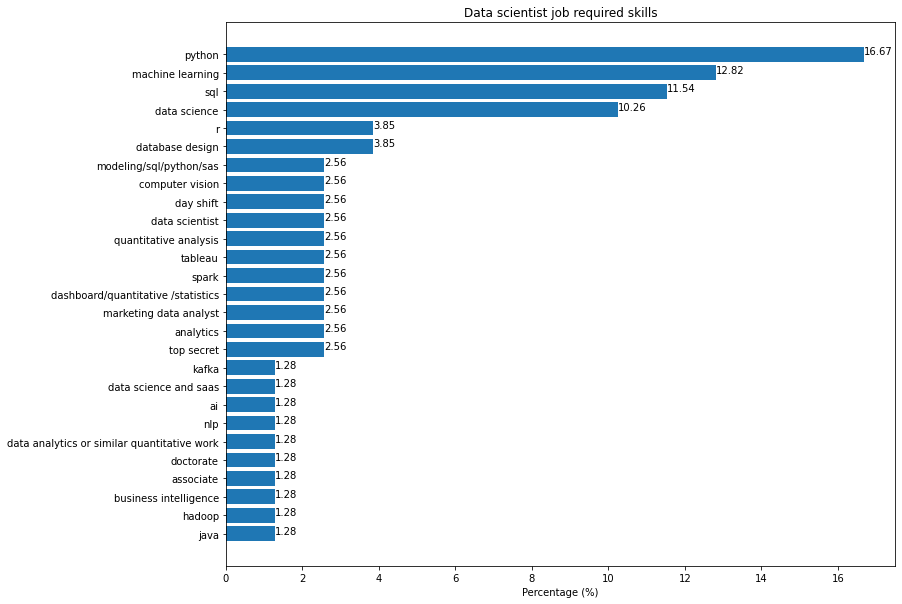

In [199]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()
p = ax.barh(required_skill.keys(), required_skill)
for i, rect in enumerate(required_skill.index):
    ax.text(required_skill[rect], i, required_skill[rect])
plt.title("Data scientist job required skills")
plt.xlabel('Percentage (%)')

In [200]:
#preferred skill
preferred_skill = (removeEdu[removeEdu['required'] == 'Preferred']['skill'].value_counts().sort_values()/len(removeEdu[removeEdu['required'] == 'Preferred'])*100).apply(lambda x : round(x, 2))

Text(0.5, 0, 'Percentage (%)')

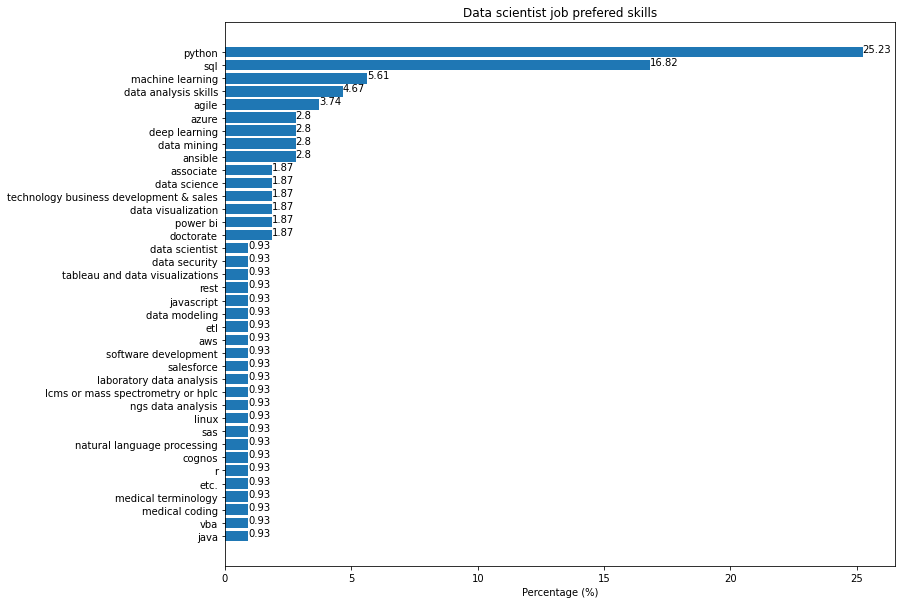

In [201]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()
p = ax.barh(preferred_skill.keys(), preferred_skill)
for i, rect in enumerate(preferred_skill.index):
    ax.text(preferred_skill[rect], i, preferred_skill[rect])
plt.title("Data scientist job prefered skills")
plt.xlabel('Percentage (%)')

In [153]:
#location analysis
df_location = df[['Title','Location']]

In [154]:
df_location['Location'] = df_location['Location'].apply(lambda x: re.sub(f'["\'\[\]\)]', '',x))

C:\Users\gq121\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [165]:
location = pd.DataFrame(df_location.Location.str.split('•').tolist(), index=df_location.Title).stack().reset_index([0, 'Title'])
location.columns = ['Title', 'location']

In [180]:
clean_loc = location['location'].apply(lambda x : x.split('+')[0])
clean_loc = clean_loc.loc[~(clean_loc=='')]

In [189]:
def getState(string):
    if len(string.split(',')) > 1:
        temp = string.split(',')[1]
        if len(string.split(',')[1].split()) > 1:
            return string.split(',')[1].split()[0]
        else:
            return temp
    return string

In [202]:
loc_list = clean_loc.apply(lambda x : getState(x).strip())
loc_list = (loc_list.value_counts().sort_values()/len(loc_list)*100).apply(lambda x : round(x, 2))

Text(0.5, 0, 'Percentage (%)')

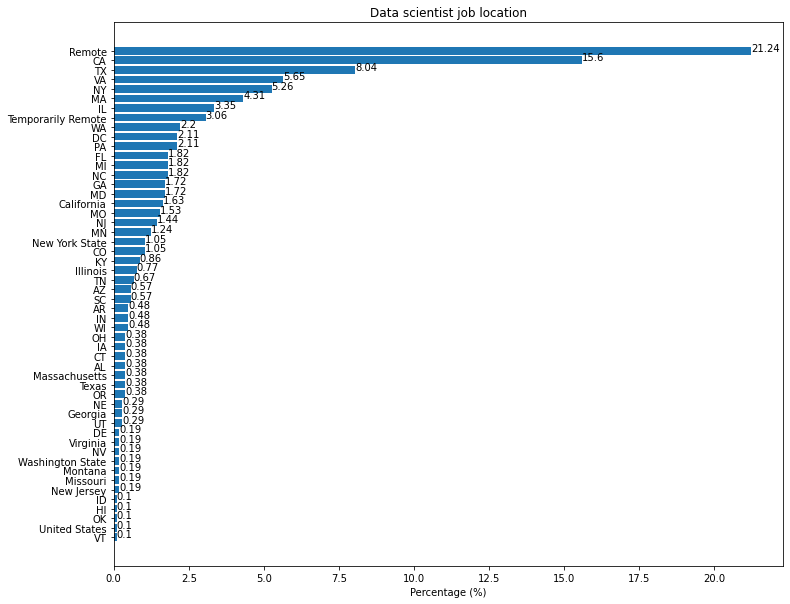

In [203]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()
p = ax.barh(loc_list.keys(), loc_list)
for i, rect in enumerate(loc_list.index):
    ax.text(loc_list[rect], i, loc_list[rect])
plt.title("Data scientist job location")
plt.xlabel('Percentage (%)')